In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression, Lasso  
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



df = pd.read_csv("HR_limpio.csv")
df


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,accounting,hr,management,marketing,product_mng,sale,sales,support,technical,hour_range
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,"[150, 200)"
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,False,False,True,False,False,"[250, 300)"
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,False,False,True,False,False,"[250, 300)"
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,"[200, 250)"
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,"[150, 200)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11987,0.74,0.95,5,266,10,0,0,1,management,high,...,False,False,True,False,False,False,False,False,False,"[250, 300)"
11988,0.85,0.54,3,185,10,0,0,1,management,high,...,False,False,True,False,False,False,False,False,False,"[150, 200)"
11989,0.33,0.65,3,172,10,0,0,1,marketing,high,...,False,False,False,True,False,False,False,False,False,"[150, 200)"
11990,0.50,0.73,4,180,3,0,0,0,IT,low,...,False,False,False,False,False,False,False,False,False,"[150, 200)"


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,accounting,hr,management,marketing,product_mng,sale,sales,support,technical,hour_range
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,"[150, 200)"
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,False,False,False,False,False,False,True,False,False,"[250, 300)"
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,False,False,False,False,False,False,True,False,False,"[250, 300)"
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,"[200, 250)"
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,False,False,False,False,False,False,True,False,False,"[150, 200)"


In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sale',
       'sales', 'support', 'technical', 'hour_range'],
      dtype='object')

In [5]:
df = pd.get_dummies(df, columns=['department'], drop_first=True)


In [6]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sale',
 'sales',
 'support',
 'technical',
 'hour_range',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sale',
 'department_sales',
 'department_support',
 'department_technical']

In [7]:
df = pd.get_dummies(df, columns=['salary'], drop_first=True)


In [8]:
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sale',
 'sales',
 'support',
 'technical',
 'hour_range',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sale',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium',
 'salary_nme']

In [9]:
# Convertir rangos en valores promedio
def parse_range(x):
    if isinstance(x, str):  # Asegurarse de que 'x' es una cadena
        try:
            x = x.strip('[]()')
            start, end = map(int, x.split(','))
            # Devolver el valor medio del rango
            return (start + end) / 2
        except ValueError:
            return np.nan  # Si hay un error, devolver NaN
    else:
        return np.nan  # Para manejar posibles valores NaN

In [10]:
# Aplicar la función para convertir los rangos en valores numéricos
df['hour_range'] = df['hour_range'].apply(parse_range)


In [11]:
# 'left' es la columna objetivo
X = df.drop(columns=['left'])  # 'left' es la columna que queremos predecir
y = df['left']  # Variable objetivo

In [12]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [57]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.') 
print(f'30% for test data: {len(X_test)}.')

100% of our data: 11992.
70% for training data: 9593.
30% for test data: 2399.


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Ahora podemos reemplazar los datos estandarizados en el dataframe original
y_pred = model.predict(X_test_scaled)


In [123]:
predictions = model.predict(X_test)
predictions

array([-9.05103945e+11, -5.45155672e+11, -8.38293193e+11, ...,
       -8.38293193e+11, -1.03840244e+12, -5.53405180e+11])

In [18]:
r2 = r2_score(y_test, predictions) 
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
print("R2 = ", round(r2, 4))
print("RMSE = ", round(RMSE, 4))
print("The value of the metric MSE is ", round(MSE, 4))
print("MAE = ", round(MAE, 4))

R2 =  -4.876204269254027e+24
RMSE =  823911615296.5597
The value of the metric MSE is  6.788303498205862e+23
MAE =  797561187140.5421


In [20]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [21]:
predictions_ridge = ridge.predict(X_test)

In [22]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
#Printing the results
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("The value of the metric MSE is ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.1833
RMSE =  0.3372
The value of the metric MSE is  0.1137
MAE =  0.2434


In [24]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [25]:
predictions_lasso = lasso.predict(X_test)

In [26]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
#Printing the results
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("The value of the metric MSE is ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.0016
RMSE =  0.3728
The value of the metric MSE is  0.139
MAE =  0.2771


In [28]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [29]:
predictions_knn = knn.predict(X_test)

In [30]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn= mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
#Printing the results
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("The value of the metric MSE is ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.5857
RMSE =  0.2402
The value of the metric MSE is  0.0577
MAE =  0.102


In [32]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [33]:
predictions_xgb = xgbr.predict(X_test)

In [34]:
r2_xgb = r2_score(y_test, predictions_xgb)
RMSE_xgb = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_xgb = mean_squared_error(y_test, predictions_xgb)
MAE_xgb = mean_absolute_error(y_test, predictions_xgb)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
#Printing the results
print("R2 = ", round(r2_xgb, 4))
print("RMSE = ", round(RMSE_xgb, 4))
print("The value of the metric MSE is ", round(MSE_xgb, 4))
print("MAE = ", round(MAE_xgb, 4))

R2 =  0.8606
RMSE =  0.1393
The value of the metric MSE is  0.0194
MAE =  0.0389


In [36]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
predictions_tree = tree.predict(X_test)

In [38]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
#Printing the results
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("The value of the metric MSE is ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.7784
RMSE =  0.1756
The value of the metric MSE is  0.0308
MAE =  0.0308


In [40]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb]
}

In [41]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost
R²,-4.876204e+24,0.183295,0.001640,0.778424,0.585713,0.860556
RMSE,8.239116e+11,0.337188,0.372806,0.175631,0.240154,0.139328
MSE,6.788303e+23,0.113696,0.138984,0.030846,0.057674,0.019412
MAE,7.975612e+11,0.243355,0.277101,0.030846,0.101959,0.038872


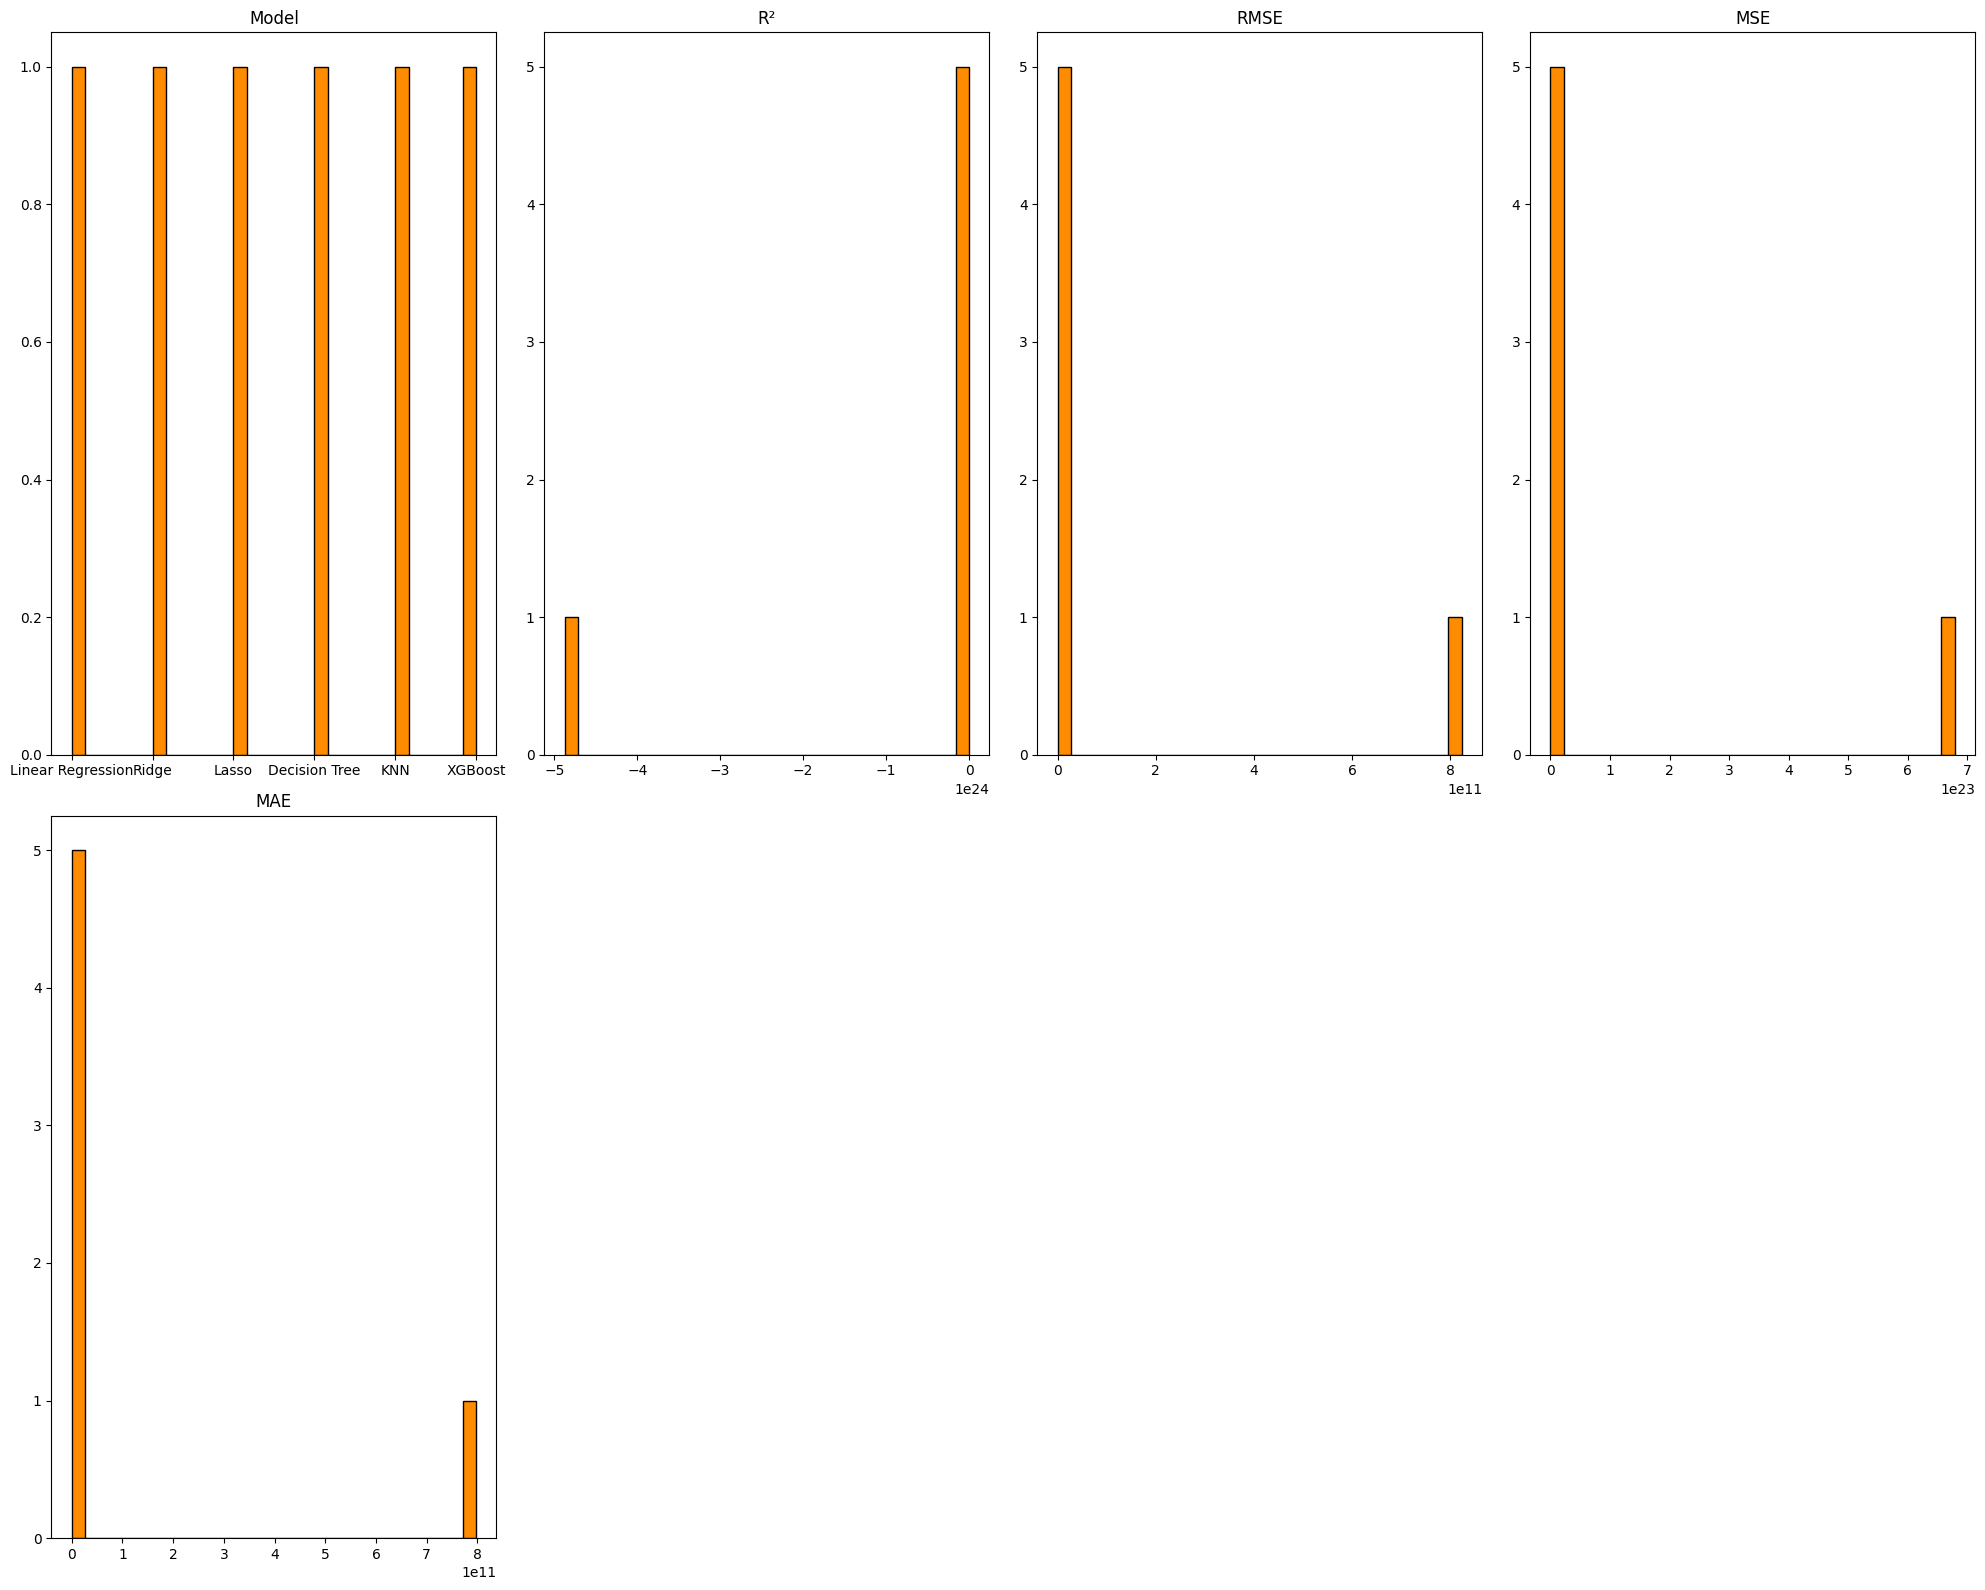

In [42]:
color = '#FF8C00'

# Número de columnas en df_metrics
num_columns = len(df_metrics.columns)

# Establece las filas y columnas del gráfico según el número de columnas de df_metrics
ncols = 4  # ajusta esto según lo que necesites (por ejemplo, 4 columnas)
nrows = (num_columns // ncols) + (1 if num_columns % ncols > 0 else 0)

# Crea la figura y los ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

# Convierte los ejes a un solo array
axes = axes.flatten()

# Graficar cada característica numérica
for i, ax in enumerate(axes):
    if i >= num_columns:
        ax.set_visible(False)  # Ocultar los subgráficos no utilizados
        continue
    ax.hist(df_metrics.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_metrics.columns[i])

plt.tight_layout()
plt.show()

In [43]:
scaler = MinMaxScaler() 

In [44]:

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [45]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train) #aqui me esta tomando valores entre 0 y 1

predictions_xgb_2 = xgbr.predict(X_test_scaled) #esta tomando valores entre 0 y 1

In [46]:
#La Y (target) no la transformo porque ya esta en las unidades originales, asi despues no tengo que cambiar todo otra vez a unidades originales. 
r2_scaler = r2_score(y_test, predictions_xgb_2)
RMSE_scaler = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_scaler = mean_squared_error(y_test, predictions_xgb_2)
MAE_scaler = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_scaler, 4))
print("RMSE = ", round(RMSE_scaler, 4))
print("The value of the metric MSE is ", round(MSE_scaler, 4))
print("MAE = ", round(MAE_scaler, 4))

R2 =  0.8543
RMSE =  0.1424
The value of the metric MSE is  0.0203
MAE =  0.0456


C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [49]:
r2_xg_stand = r2_score(y_test, predictions_xgb_2)
RMSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_stand = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_stand = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_stand, 4))
print("RMSE = ", round(RMSE_xg_stand, 4))
print("The value of the metric MSE is ", round(MSE_xg_stand, 4))
print("MAE = ", round(MAE_xg_stand, 4))

R2 =  0.8543
RMSE =  0.1424
The value of the metric MSE is  0.0203
MAE =  0.0456


C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [51]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [52]:
r2_xg_log = r2_score(y_test, predictions_xgb_2)
RMSE_xg_log = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_xg_log = mean_squared_error(y_test, predictions_xgb_2)
MAE_xg_log = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_xg_log, 4))
print("RMSE = ", round(RMSE_xg_log, 4))
print("The value of the metric MSE is ", round(MSE_xg_log, 4))
print("MAE = ", round(MAE_xg_log, 4))

R2 =  0.8543
RMSE =  0.1424
The value of the metric MSE is  0.0203
MAE =  0.0456


C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
normalizations = {
    'Model': ['MinMaxScaler ', 'StandardScaler', 'Log_Transform'],
    'R²': [r2_scaler, r2_xg_stand, r2_xg_log],
    'RMSE': [RMSE_scaler, RMSE_xg_stand, RMSE_xg_log],
    'MSE': [MSE_scaler, MSE_xg_stand, MSE_xg_log],
    'MAE': [MAE_scaler, MAE_xg_stand, MAE_xg_log]
}

In [54]:
df_normalizations = pd.DataFrame(normalizations)
df_normalizations.set_index("Model").T

Model,MinMaxScaler,StandardScaler,Log_Transform
R²,0.854350,0.854350,0.854350
RMSE,0.142395,0.142395,0.142395
MSE,0.020276,0.020276,0.020276
MAE,0.045593,0.045593,0.045593


Final Conclusions

In [55]:
all_metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost','MinMaxScaler ', 'StandardScaler', 'Log_Transform'],
    'R²': [r2, r2_ridge, r2_lasso, r2_tree, r2_knn, r2_xgb,r2_scaler, r2_xg_stand, r2_xg_log],
    'RMSE': [RMSE, RMSE_ridge, RMSE_lasso, RMSE_tree, RMSE_knn, RMSE_xgb,RMSE_scaler, RMSE_xg_stand, RMSE_xg_log],
    'MSE': [MSE, MSE_ridge, MSE_lasso, MSE_tree, MSE_knn, MSE_xgb, MSE_scaler, MSE_xg_stand, MSE_xg_log ],
    'MAE': [MAE, MAE_ridge, MAE_lasso, MAE_tree, MAE_knn, MAE_xgb, MAE_scaler, MAE_xg_stand, MAE_xg_log]
}

In [56]:
df_all_metrics = pd.DataFrame(all_metrics)
df_all_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost,MinMaxScaler,StandardScaler,Log_Transform
R²,-4.876204e+24,0.183295,0.001640,0.778424,0.585713,0.860556,0.854350,0.854350,0.854350
RMSE,8.239116e+11,0.337188,0.372806,0.175631,0.240154,0.139328,0.142395,0.142395,0.142395
MSE,6.788303e+23,0.113696,0.138984,0.030846,0.057674,0.019412,0.020276,0.020276,0.020276
MAE,7.975612e+11,0.243355,0.277101,0.030846,0.101959,0.038872,0.045593,0.045593,0.045593


# CONCLUSION

XGBoost es el modelo con el mejor rendimiento global en términos de R², RMSE, MSE y MAE, lo que lo convierte en la mejor opción en este caso.

Árbol de Decisión también es una opción sólida, con un rendimiento superior al de otros modelos lineales (como Ridge y Lasso) y al KNN.

La regresión lineal claramente no es adecuada para este conjunto de datos, ya que produce resultados inusualmente malos en todas las métricas.

El preprocesamiento no parece tener un impacto significativo en los resultados generales de los modelos probados.

En resumen, para este caso específico, se recomienda priorizar el uso de XGBoost o, en su defecto, un Árbol de Decisión, mientras que los métodos de preprocesamiento no muestran mejoras sustanciales.